<a href="https://colab.research.google.com/github/hans0809/AI-Competition-Collections/blob/main/uwmgi_2_5d_train_pytorch_3d000a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [UW-Madison GI Tract Image Segmentation](https://www.kaggle.com/competitions/uw-madison-gi-tract-image-segmentation/)
> Track healthy organs in medical scans to improve cancer treatment

<img src="https://storage.googleapis.com/kaggle-competitions/kaggle/27923/logos/header.png?t=2021-06-02-20-30-25">

# ⚽ Methodlogy
<img src="https://i.ibb.co/sgsPf4v/Capture.png" width=800>
<img src="https://i.ibb.co/KKtZ7Gn/Picture1-3d.png" width=500>

* In this notebook I'll demonstrate how to train using 2.5D images with **Unet** model using PyTorch.
* 2.5D images take leverage of the extra depth information like our typical RGB image.
* In this notebook I'll be using 3 channels with 2 strides for 2.5D images
* Instead of Resize I'll be using Padding to avoid info loss.
* For mask I'll be using pre-computed 2.5D images & mask from [here](https://www.kaggle.com/code/awsaf49/uwmgi-2-5d-stride-2-dataset)
* As there are overlaps between **Stomach**, **Large Bowel** & **Small Bowel** classes, this is a **MultiLabel Segmentation** task, so final activaion should be `sigmoid` instead of `softmax`.
* For data split I'll be using **StratifiedGroupFold** to avoid data leakage due to `case` and to stratify `empty` and `non-empty` mask cases.
* You can play with different models and losses.

## Please Upvote if you Find this Useful :)

# 📒 Notebooks
📌 **2.5D**:
* Train: [UWMGI: 2.5D [Train] [PyTorch]](https://www.kaggle.com/awsaf49/uwmgi-2-5d-train-pytorch/)
* Infer: [UWMGI: 2.5D [Infer] [PyTorch]](https://www.kaggle.com/awsaf49/uwmgi-2-5d-infer-pytorch/)
* Data: [UWMGI: 2.5D stride=2 Data](https://www.kaggle.com/code/awsaf49/uwmgi-2-5d-stride-2-data/)
* Dataset: [UWMGI: 2.5D stride=2 Dataset](https://www.kaggle.com/datasets/awsaf49/uwmgi-25d-stride2-dataset)

📌 **UNet**:
* Train: [UWMGI: Unet [Train] [PyTorch]](https://www.kaggle.com/code/awsaf49/uwmgi-unet-train-pytorch/)
* Infer: [UWMGI: Unet [Infer] [PyTorch]](https://www.kaggle.com/code/awsaf49/uwmgi-unet-infer-pytorch/)

📌 **MMDetection**:
* Train: [UWMGI: MMDetection [Train]](https://www.kaggle.com/code/awsaf49/uwmgi-mmdetection-train)

📌 **Data/Dataset**:
* Data: [UWMGI: Mask Data](https://www.kaggle.com/datasets/awsaf49/uwmgi-mask-data)
* Dataset: [UWMGI: Mask Dataset](https://www.kaggle.com/datasets/awsaf49/uwmgi-mask-dataset)

# 从kaggle获取所需数据集

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!ls -lha /content/drive/MyDrive/TaiDiCup2022A/kaggle.json

-rw------- 1 root root 68 Apr 19 06:24 /content/drive/MyDrive/TaiDiCup2022A/kaggle.json


In [3]:
!pip install -q kaggle

In [4]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/TaiDiCup2022A/kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle competitions download -c uw-madison-gi-tract-image-segmentation

 99% 2.27G/2.30G [01:12<00:00, 30.7MB/s]
100% 2.30G/2.30G [01:12<00:00, 34.1MB/s]


In [6]:
!kaggle datasets download -d awsaf49/uwmgi-mask-dataset

 94% 73.0M/77.3M [00:02<00:00, 31.9MB/s]
100% 77.3M/77.3M [00:02<00:00, 28.1MB/s]


In [7]:
!kaggle datasets download -d awsaf49/uwmgi-25d-stride2-dataset

100% 7.06G/7.09G [02:47<00:00, 61.8MB/s]
100% 7.09G/7.09G [02:47<00:00, 45.5MB/s]


In [8]:
!kaggle datasets download -d awsaf49/pytorch-segmentation-models-lib

  0% 0.00/536k [00:00<?, ?B/s]
100% 536k/536k [00:00<00:00, 99.1MB/s]


In [9]:
!unzip /content/uwmgi-mask-dataset.zip -d uwmgi-mask-dataset

流式输出内容被截断，只能显示最后 5000 行内容。
  inflating: uwmgi-mask-dataset/png/uw-madison-gi-tract-image-segmentation/train/case77/case77_day20/scans/slice_0123_266_266_1.50_1.50.png  
  inflating: uwmgi-mask-dataset/png/uw-madison-gi-tract-image-segmentation/train/case77/case77_day20/scans/slice_0124_266_266_1.50_1.50.png  
  inflating: uwmgi-mask-dataset/png/uw-madison-gi-tract-image-segmentation/train/case77/case77_day20/scans/slice_0125_266_266_1.50_1.50.png  
  inflating: uwmgi-mask-dataset/png/uw-madison-gi-tract-image-segmentation/train/case77/case77_day20/scans/slice_0126_266_266_1.50_1.50.png  
  inflating: uwmgi-mask-dataset/png/uw-madison-gi-tract-image-segmentation/train/case77/case77_day20/scans/slice_0127_266_266_1.50_1.50.png  
  inflating: uwmgi-mask-dataset/png/uw-madison-gi-tract-image-segmentation/train/case77/case77_day20/scans/slice_0128_266_266_1.50_1.50.png  
  inflating: uwmgi-mask-dataset/png/uw-madison-gi-tract-image-segmentation/train/case77/case77_day20/scans/slice_0129_266

In [10]:
!unzip /content/uw-madison-gi-tract-image-segmentation.zip -d uw-madison-gi-tract-image-segmentation

流式输出内容被截断，只能显示最后 5000 行内容。
  inflating: uw-madison-gi-tract-image-segmentation/train/case77/case77_day20/scans/slice_0121_266_266_1.50_1.50.png  
  inflating: uw-madison-gi-tract-image-segmentation/train/case77/case77_day20/scans/slice_0122_266_266_1.50_1.50.png  
  inflating: uw-madison-gi-tract-image-segmentation/train/case77/case77_day20/scans/slice_0123_266_266_1.50_1.50.png  
  inflating: uw-madison-gi-tract-image-segmentation/train/case77/case77_day20/scans/slice_0124_266_266_1.50_1.50.png  
  inflating: uw-madison-gi-tract-image-segmentation/train/case77/case77_day20/scans/slice_0125_266_266_1.50_1.50.png  
  inflating: uw-madison-gi-tract-image-segmentation/train/case77/case77_day20/scans/slice_0126_266_266_1.50_1.50.png  
  inflating: uw-madison-gi-tract-image-segmentation/train/case77/case77_day20/scans/slice_0127_266_266_1.50_1.50.png  
  inflating: uw-madison-gi-tract-image-segmentation/train/case77/case77_day20/scans/slice_0128_266_266_1.50_1.50.png  
  inflating: uw-madis

In [11]:
!unzip /content/uwmgi-25d-stride2-dataset.zip -d uwmgi-25d-stride2-dataset

流式输出内容被截断，只能显示最后 5000 行内容。
  inflating: uwmgi-25d-stride2-dataset/masks/masks/case78_day22_slice_0123.npy  
  inflating: uwmgi-25d-stride2-dataset/masks/masks/case78_day22_slice_0124.npy  
  inflating: uwmgi-25d-stride2-dataset/masks/masks/case78_day22_slice_0125.npy  
  inflating: uwmgi-25d-stride2-dataset/masks/masks/case78_day22_slice_0126.npy  
  inflating: uwmgi-25d-stride2-dataset/masks/masks/case78_day22_slice_0127.npy  
  inflating: uwmgi-25d-stride2-dataset/masks/masks/case78_day22_slice_0128.npy  
  inflating: uwmgi-25d-stride2-dataset/masks/masks/case78_day22_slice_0129.npy  
  inflating: uwmgi-25d-stride2-dataset/masks/masks/case78_day22_slice_0130.npy  
  inflating: uwmgi-25d-stride2-dataset/masks/masks/case78_day22_slice_0131.npy  
  inflating: uwmgi-25d-stride2-dataset/masks/masks/case78_day22_slice_0132.npy  
  inflating: uwmgi-25d-stride2-dataset/masks/masks/case78_day22_slice_0133.npy  
  inflating: uwmgi-25d-stride2-dataset/masks/masks/case78_day22_slice_0134.npy  
 

In [12]:
!unzip /content/pytorch-segmentation-models-lib.zip -d pytorch-segmentation-models-lib

Archive:  /content/pytorch-segmentation-models-lib.zip
  inflating: pytorch-segmentation-models-lib/efficientnet_pytorch-0.6.3/efficientnet_pytorch-0.6.3/PKG-INFO  
  inflating: pytorch-segmentation-models-lib/efficientnet_pytorch-0.6.3/efficientnet_pytorch-0.6.3/README.md  
  inflating: pytorch-segmentation-models-lib/efficientnet_pytorch-0.6.3/efficientnet_pytorch-0.6.3/efficientnet_pytorch.egg-info/PKG-INFO  
  inflating: pytorch-segmentation-models-lib/efficientnet_pytorch-0.6.3/efficientnet_pytorch-0.6.3/efficientnet_pytorch.egg-info/SOURCES.txt  
  inflating: pytorch-segmentation-models-lib/efficientnet_pytorch-0.6.3/efficientnet_pytorch-0.6.3/efficientnet_pytorch.egg-info/dependency_links.txt  
  inflating: pytorch-segmentation-models-lib/efficientnet_pytorch-0.6.3/efficientnet_pytorch-0.6.3/efficientnet_pytorch.egg-info/requires.txt  
  inflating: pytorch-segmentation-models-lib/efficientnet_pytorch-0.6.3/efficientnet_pytorch-0.6.3/efficientnet_pytorch.egg-info/top_level.txt  


# 🛠 Install Libraries

In [16]:
!pip install -q segmentation_models_pytorch
!pip install -qU wandb
!pip install -q scikit-learn==1.0
########################
!pip install rasterio
!pip install colorama

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.3 MB 3.7 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
!pip install -U albumentations
!pip uninstall opencv-python-headless 
!pip install opencv-python-headless==4.1.2.30

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 102 kB 4.3 MB/s 
     |████████████████████████████████| 47.8 MB 1.3 MB/s 
  Attempting uninstall: albumentations
    Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


Found existing installation: opencv-python-headless 4.5.5.64
Uninstalling opencv-python-headless-4.5.5.64:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/cv2/*
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless-4.5.5.64.dist-info/*
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavcodec-65fa80df.so.58.134.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavformat-8ef5c7db.so.58.76.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavutil-9c768859.so.56.70.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libbz2-a273e504.so.1.0.6
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libcrypto-09fe7800.so.1.1
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libgfortran-91cc3cb1.so.3.0.0
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libopenblas-r0-f650aae0.3.3.so
    /usr/local/lib/python3.7/dis

# 📚 Import Libraries 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
pd.options.plotting.backend = "plotly"
import random
from glob import glob
import os, shutil
from tqdm import tqdm
tqdm.pandas()
import time
import copy
import joblib
from collections import defaultdict
import gc
from IPython import display as ipd

# visualization
import cv2
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Sklearn
from sklearn.model_selection import StratifiedKFold, KFold, StratifiedGroupKFold

# PyTorch 
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.utils.data import Dataset, DataLoader
from torch.cuda import amp

import timm

# Albumentations for augmentations
import albumentations as A
from albumentations.pytorch import ToTensorV2

import rasterio
from joblib import Parallel, delayed

# For colored terminal text
from colorama import Fore, Back, Style
c_  = Fore.GREEN
sr_ = Style.RESET_ALL

import warnings
warnings.filterwarnings("ignore")

# For descriptive error messages
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

# ⭐ WandB

<img src="https://camo.githubusercontent.com/dd842f7b0be57140e68b2ab9cb007992acd131c48284eaf6b1aca758bfea358b/68747470733a2f2f692e696d6775722e636f6d2f52557469567a482e706e67" width="400" alt="Weights & Biases" />

Weights & Biases (W&B) is MLOps platform for tracking our experiemnts. We can use it to Build better models faster with experiment tracking, dataset versioning, and model management. Some of the cool features of **W&B**:

* Track, compare, and visualize ML experiments
* Get live metrics, terminal logs, and system stats streamed to the centralized dashboard.
* Explain how your model works, show graphs of how model versions improved, discuss bugs, and demonstrate progress towards milestones.

In [5]:

import wandb

try:
    # from kaggle_secrets import UserSecretsClient
    # user_secrets = UserSecretsClient()
    api_key = 'd51eadc3bf70a1842e9479629152f0d8b091669e'#user_secrets.get_secret("")
    wandb.login(key=api_key)
    anonymous = None
    print('login my account')
except:
    anonymous = "must"
    print('To use your W&B account,\nGo to Add-ons -> Secrets and provide your W&B access token. Use the Label name as WANDB. \nGet your W&B access token from here: https://wandb.ai/authorize')

wandb: Currently logged in as: fuhanshi. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


login my account


# ⚙️ Configuration 

In [29]:
class CFG:
    save_dir='/content/drive/MyDrive/UWMGI/'
    seed          = 101
    debug         = False # set debug=False for Full Training
    exp_name      = '2.5D'
    comment       = 'unet-efficientnet_b0-320x384-ep=20'
    model_name    = 'Unet'
    backbone      = 'efficientnet-b0'
    train_bs      = 64
    valid_bs      = train_bs*2
    img_size      = [320, 384]
    epochs        = 15
    lr            = 2e-3
    scheduler     = 'CosineAnnealingLR'
    min_lr        = 1e-6
    T_max         = int(30000/train_bs*epochs)+50
    T_0           = 25
    warmup_epochs = 0
    wd            = 1e-6
    n_accumulate  = max(1, 32//train_bs)
    n_fold        = 5
    folds         = [0]
    num_classes   = 3
    device        = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# ❗ Reproducibility

In [30]:
def set_seed(seed = 42):
    '''Sets the seed of the entire notebook so results are the same every time we run.
    This is for REPRODUCIBILITY.'''
    np.random.seed(seed)
    random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    # When running on the CuDNN backend, two further options must be set
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    # Set a fixed value for the hash seed
    os.environ['PYTHONHASHSEED'] = str(seed)
    print('> SEEDING DONE')
    
set_seed(CFG.seed)

> SEEDING DONE


# 📖 Meta Data

* Files
    * train.csv - IDs and masks for all training objects.
    * sample_submission.csv - a sample submission file in the correct format
    * train - a folder of case/day folders, each containing slice images for a particular case on a given day.

> Note that the image filenames include 4 numbers (ex. `276_276_1.63_1.63.png`). These four numbers are slice height / width (integers in pixels) and heigh/width pixel spacing (floating points in mm). The first two defines the resolution of the slide. The last two record the physical size of each pixel.

* Columns
    * id - unique identifier for object
    * class - the predicted class for the object
    * EncodedPixels - RLE-encoded pixels for the identified object

In [31]:
path_df = pd.DataFrame(glob('/content/uwmgi-25d-stride2-dataset/images/images/*'), columns=['image_path'])
path_df['mask_path'] = path_df.image_path.str.replace('image','mask')
path_df['id'] = path_df.image_path.map(lambda x: x.split('/')[-1].replace('.npy',''))
path_df.head()

,image_path,mask_path,id
0,/content/uwmgi-25d-stride2-dataset/images/imag...,/content/uwmgi-25d-stride2-dataset/masks/masks...,case134_day0_slice_0052
1,/content/uwmgi-25d-stride2-dataset/images/imag...,/content/uwmgi-25d-stride2-dataset/masks/masks...,case108_day13_slice_0079
2,/content/uwmgi-25d-stride2-dataset/images/imag...,/content/uwmgi-25d-stride2-dataset/masks/masks...,case122_day24_slice_0072
3,/content/uwmgi-25d-stride2-dataset/images/imag...,/content/uwmgi-25d-stride2-dataset/masks/masks...,case44_day20_slice_0023
4,/content/uwmgi-25d-stride2-dataset/images/imag...,/content/uwmgi-25d-stride2-dataset/masks/masks...,case123_day22_slice_0023


In [32]:
df = pd.read_csv('/content/uwmgi-mask-dataset/train.csv')
df['segmentation'] = df.segmentation.fillna('')
df['rle_len'] = df.segmentation.map(len) # length of each rle mask

df2 = df.groupby(['id'])['segmentation'].agg(list).to_frame().reset_index() # rle list of each id
df2 = df2.merge(df.groupby(['id'])['rle_len'].agg(sum).to_frame().reset_index()) # total length of all rles of each id

df = df.drop(columns=['segmentation', 'class', 'rle_len'])
df = df.groupby(['id']).head(1).reset_index(drop=True)
df = df.merge(df2, on=['id'])
df['empty'] = (df.rle_len==0) # empty masks

df = df.drop(columns=['image_path','mask_path'])
df = df.merge(path_df, on=['id'])
df.head()

,id,case,day,slice,height,width,segmentation,rle_len,empty,image_path,mask_path
0,case123_day20_slice_0001,123,20,1,266,266,"[, , ]",0,True,/content/uwmgi-25d-stride2-dataset/images/imag...,/content/uwmgi-25d-stride2-dataset/masks/masks...
1,case123_day20_slice_0002,123,20,2,266,266,"[, , ]",0,True,/content/uwmgi-25d-stride2-dataset/images/imag...,/content/uwmgi-25d-stride2-dataset/masks/masks...
2,case123_day20_slice_0003,123,20,3,266,266,"[, , ]",0,True,/content/uwmgi-25d-stride2-dataset/images/imag...,/content/uwmgi-25d-stride2-dataset/masks/masks...
3,case123_day20_slice_0004,123,20,4,266,266,"[, , ]",0,True,/content/uwmgi-25d-stride2-dataset/images/imag...,/content/uwmgi-25d-stride2-dataset/masks/masks...
4,case123_day20_slice_0005,123,20,5,266,266,"[, , ]",0,True,/content/uwmgi-25d-stride2-dataset/images/imag...,/content/uwmgi-25d-stride2-dataset/masks/masks...


# Remove Faulty

In [33]:
fault1 = 'case7_day0'
fault2 = 'case81_day30'
df = df[~df['id'].str.contains(fault1) & ~df['id'].str.contains(fault2)].reset_index(drop=True)
df.head()

,id,case,day,slice,height,width,segmentation,rle_len,empty,image_path,mask_path
0,case123_day20_slice_0001,123,20,1,266,266,"[, , ]",0,True,/content/uwmgi-25d-stride2-dataset/images/imag...,/content/uwmgi-25d-stride2-dataset/masks/masks...
1,case123_day20_slice_0002,123,20,2,266,266,"[, , ]",0,True,/content/uwmgi-25d-stride2-dataset/images/imag...,/content/uwmgi-25d-stride2-dataset/masks/masks...
2,case123_day20_slice_0003,123,20,3,266,266,"[, , ]",0,True,/content/uwmgi-25d-stride2-dataset/images/imag...,/content/uwmgi-25d-stride2-dataset/masks/masks...
3,case123_day20_slice_0004,123,20,4,266,266,"[, , ]",0,True,/content/uwmgi-25d-stride2-dataset/images/imag...,/content/uwmgi-25d-stride2-dataset/masks/masks...
4,case123_day20_slice_0005,123,20,5,266,266,"[, , ]",0,True,/content/uwmgi-25d-stride2-dataset/images/imag...,/content/uwmgi-25d-stride2-dataset/masks/masks...


## Class Distribution

In [34]:
df['empty'].value_counts().plot.bar()

# 🔨 Utility

## Mask

In [35]:
def id2mask(id_):
    idf = df[df['id']==id_]
    wh = idf[['height','width']].iloc[0]
    shape = (wh.height, wh.width, 3)
    mask = np.zeros(shape, dtype=np.uint8)
    for i, class_ in enumerate(['large_bowel', 'small_bowel', 'stomach']):
        cdf = idf[idf['class']==class_]
        rle = cdf.segmentation.squeeze()
        if len(cdf) and not pd.isna(rle):
            mask[..., i] = rle_decode(rle, shape[:2])
    return mask

def rgb2gray(mask):
    pad_mask = np.pad(mask, pad_width=[(0,0),(0,0),(1,0)])
    gray_mask = pad_mask.argmax(-1)
    return gray_mask

def gray2rgb(mask):
    rgb_mask = tf.keras.utils.to_categorical(mask, num_classes=4)
    return rgb_mask[..., 1:].astype(mask.dtype)

## Image

In [36]:
def load_img(path):
    img = np.load(path)
    img = img.astype('float32') # original is uint16
    mx = np.max(img)
    if mx:
        img/=mx # scale image to [0, 1]
    return img

def load_msk(path):
    msk = np.load(path)
    msk = msk.astype('float32')
    msk/=255.0
    return msk
    

def show_img(img, mask=None):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
#     img = clahe.apply(img)
#     plt.figure(figsize=(10,10))
    plt.imshow(img, cmap='bone')
    
    if mask is not None:
        # plt.imshow(np.ma.masked_where(mask!=1, mask), alpha=0.5, cmap='autumn')
        plt.imshow(mask, alpha=0.5)
        handles = [Rectangle((0,0),1,1, color=_c) for _c in [(0.667,0.0,0.0), (0.0,0.667,0.0), (0.0,0.0,0.667)]]
        labels = ["Large Bowel", "Small Bowel", "Stomach"]
        plt.legend(handles,labels)
    plt.axis('off')

## RLE

In [37]:
# ref: https://www.kaggle.com/paulorzp/run-length-encode-and-decode
def rle_decode(mask_rle, shape):
    '''
    mask_rle: run-length as string formated (start length)
    shape: (height,width) of array to return 
    Returns numpy array, 1 - mask, 0 - background

    '''
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0]*shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape(shape)  # Needed to align to RLE direction


# ref.: https://www.kaggle.com/stainsby/fast-tested-rle
def rle_encode(img):
    '''
    img: numpy array, 1 - mask, 0 - background
    Returns run length as string formated
    '''
    pixels = img.flatten()
    pixels = np.concatenate([[0], pixels, [0]])
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    runs[1::2] -= runs[::2]
    return ' '.join(str(x) for x in runs)

# 📁 Create Folds

In [38]:
skf = StratifiedGroupKFold(n_splits=CFG.n_fold, shuffle=True, random_state=CFG.seed)
for fold, (train_idx, val_idx) in enumerate(skf.split(df, df['empty'], groups = df["case"])):
    df.loc[val_idx, 'fold'] = fold
display(df.groupby(['fold','empty'])['id'].count())

fold  empty
0.0   False    3374
      True     4706
1.0   False    4112
      True     4896
2.0   False    2973
      True     3827
3.0   False    3407
      True     4689
4.0   False    2627
      True     3597
Name: id, dtype: int64

# 🍚 Dataset

In [39]:
class BuildDataset(torch.utils.data.Dataset):
    def __init__(self, df, label=True, transforms=None):
        self.df         = df
        self.label      = label
        self.img_paths  = df['image_path'].tolist()
        self.msk_paths  = df['mask_path'].tolist()
        self.transforms = transforms
        
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, index):
        img_path  = self.img_paths[index]
        img = []
        img = load_img(img_path)
        
        if self.label:
            msk_path = self.msk_paths[index]
            msk = load_msk(msk_path)
            if self.transforms:
                data = self.transforms(image=img, mask=msk)
                img  = data['image']
                msk  = data['mask']
            img = np.transpose(img, (2, 0, 1))
            msk = np.transpose(msk, (2, 0, 1))
            return torch.tensor(img), torch.tensor(msk)
        else:
            if self.transforms:
                data = self.transforms(image=img)
                img  = data['image']
            img = np.transpose(img, (2, 0, 1))
            return torch.tensor(img)

# 🌈 Augmentations

In [40]:
data_transforms = {
    "train": A.Compose([
#         A.Resize(*CFG.img_size, interpolation=cv2.INTER_NEAREST),
        A.HorizontalFlip(p=0.5),
#         A.VerticalFlip(p=0.5),
        A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.05, rotate_limit=10, p=0.5),
        A.OneOf([
            A.GridDistortion(num_steps=5, distort_limit=0.05, p=1.0),
# #             A.OpticalDistortion(distort_limit=0.05, shift_limit=0.05, p=1.0),
            A.ElasticTransform(alpha=1, sigma=50, alpha_affine=50, p=1.0)
        ], p=0.25),
        A.CoarseDropout(max_holes=8, max_height=CFG.img_size[0]//20, max_width=CFG.img_size[1]//20,
                         min_holes=5, fill_value=0, mask_fill_value=0, p=0.5),
        ], p=1.0),
    
    "valid": A.Compose([
#         A.Resize(*CFG.img_size, interpolation=cv2.INTER_NEAREST),
        ], p=1.0)
}

# 🍰 DataLoader

In [41]:
def prepare_loaders(fold, debug=False):
    train_df = df.query("fold!=@fold").reset_index(drop=True)
    valid_df = df.query("fold==@fold").reset_index(drop=True)
    if debug:
        train_df = train_df.head(32*5).query("empty==0")
        valid_df = valid_df.head(32*3).query("empty==0")
    train_dataset = BuildDataset(train_df, transforms=data_transforms['train'])
    valid_dataset = BuildDataset(valid_df, transforms=data_transforms['valid'])

    train_loader = DataLoader(train_dataset, batch_size=CFG.train_bs if not debug else 20, 
                              num_workers=4, shuffle=True, pin_memory=True, drop_last=False)
    valid_loader = DataLoader(valid_dataset, batch_size=CFG.valid_bs if not debug else 20, 
                              num_workers=4, shuffle=False, pin_memory=True)
    
    return train_loader, valid_loader


In [42]:
train_loader, valid_loader = prepare_loaders(fold=0, debug=True)

In [43]:
imgs, msks = next(iter(train_loader))
imgs.size(), msks.size()

(torch.Size([20, 3, 320, 384]), torch.Size([20, 3, 320, 384]))

# 📈 Visualization

In [44]:
def plot_batch(imgs, msks, size=3):
    plt.figure(figsize=(5*5, 5))
    for idx in range(size):
        plt.subplot(1, 5, idx+1)
        img = imgs[idx,].permute((1, 2, 0)).numpy()*255.0
        img = img.astype('uint8')
        msk = msks[idx,].permute((1, 2, 0)).numpy()*255.0
        show_img(img, msk)
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


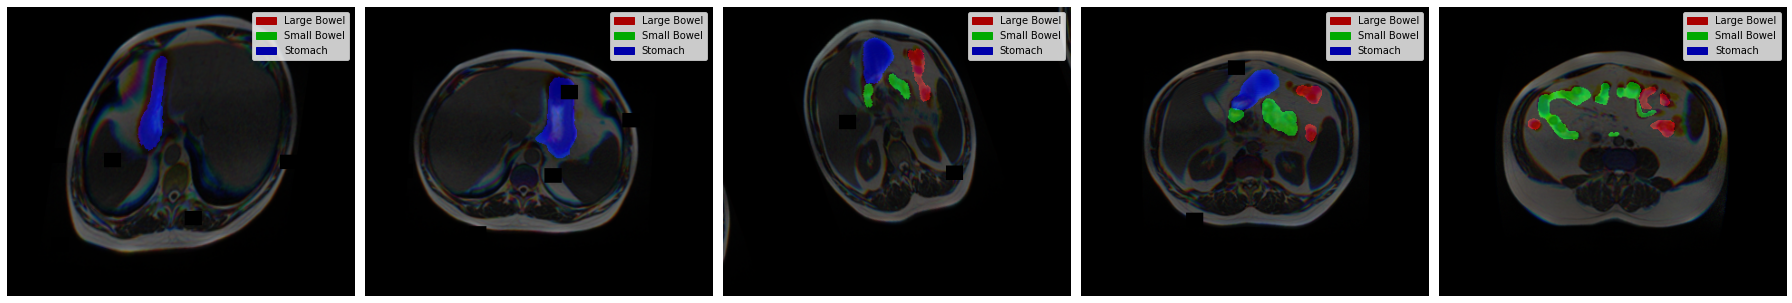

In [45]:
plot_batch(imgs, msks, size=5)

In [46]:
import gc
gc.collect()

13226

# 📦 Model


In [47]:
import segmentation_models_pytorch as smp

def build_model():
    model = smp.Unet(
        encoder_name=CFG.backbone,      # choose encoder, e.g. mobilenet_v2 or efficientnet-b7
        encoder_weights="imagenet",     # use `imagenet` pre-trained weights for encoder initialization
        in_channels=3,                  # model input channels (1 for gray-scale images, 3 for RGB, etc.)
        classes=CFG.num_classes,        # model output channels (number of classes in your dataset)
        activation=None,
    )
    model.to(CFG.device)
    return model

def load_model(path):
    model = build_model()
    model.load_state_dict(torch.load(path))
    model.eval()
    return model

# 🔧 Loss Function

In [48]:
JaccardLoss = smp.losses.JaccardLoss(mode='multilabel')
DiceLoss    = smp.losses.DiceLoss(mode='multilabel')
BCELoss     = smp.losses.SoftBCEWithLogitsLoss()
LovaszLoss  = smp.losses.LovaszLoss(mode='multilabel', per_image=False)
TverskyLoss = smp.losses.TverskyLoss(mode='multilabel', log_loss=False)

def dice_coef(y_true, y_pred, thr=0.5, dim=(2,3), epsilon=0.001):
    y_true = y_true.to(torch.float32)
    y_pred = (y_pred>thr).to(torch.float32)
    inter = (y_true*y_pred).sum(dim=dim)
    den = y_true.sum(dim=dim) + y_pred.sum(dim=dim)
    dice = ((2*inter+epsilon)/(den+epsilon)).mean(dim=(1,0))
    return dice

def iou_coef(y_true, y_pred, thr=0.5, dim=(2,3), epsilon=0.001):
    y_true = y_true.to(torch.float32)
    y_pred = (y_pred>thr).to(torch.float32)
    inter = (y_true*y_pred).sum(dim=dim)
    union = (y_true + y_pred - y_true*y_pred).sum(dim=dim)
    iou = ((inter+epsilon)/(union+epsilon)).mean(dim=(1,0))
    return iou

def criterion(y_pred, y_true):
    return 0.5*BCELoss(y_pred, y_true) + 0.5*TverskyLoss(y_pred, y_true)

# 🚄 Training Function

In [49]:
def train_one_epoch(model, optimizer, scheduler, dataloader, device, epoch):
    model.train()
    scaler = amp.GradScaler()
    
    dataset_size = 0
    running_loss = 0.0
    
    pbar = tqdm(enumerate(dataloader), total=len(dataloader), desc='Train ')
    for step, (images, masks) in pbar:         
        images = images.to(device, dtype=torch.float)
        masks  = masks.to(device, dtype=torch.float)
        
        batch_size = images.size(0)
        
        with amp.autocast(enabled=True):
            y_pred = model(images)
            loss   = criterion(y_pred, masks)
            loss   = loss / CFG.n_accumulate
            
        scaler.scale(loss).backward()
    
        if (step + 1) % CFG.n_accumulate == 0:
            scaler.step(optimizer)
            scaler.update()

            # zero the parameter gradients
            optimizer.zero_grad()

            if scheduler is not None:
                scheduler.step()
                
        running_loss += (loss.item() * batch_size)
        dataset_size += batch_size
        
        epoch_loss = running_loss / dataset_size
        
        mem = torch.cuda.memory_reserved() / 1E9 if torch.cuda.is_available() else 0
        current_lr = optimizer.param_groups[0]['lr']
        pbar.set_postfix(train_loss=f'{epoch_loss:0.4f}',
                        lr=f'{current_lr:0.5f}',
                        gpu_mem=f'{mem:0.2f} GB')
        torch.cuda.empty_cache()
        gc.collect()
    
    return epoch_loss

# 👀 Validation Function

In [50]:
@torch.no_grad()
def valid_one_epoch(model, dataloader, device, epoch):
    model.eval()
    
    dataset_size = 0
    running_loss = 0.0
    
    val_scores = []
    
    pbar = tqdm(enumerate(dataloader), total=len(dataloader), desc='Valid ')
    for step, (images, masks) in pbar:        
        images  = images.to(device, dtype=torch.float)
        masks   = masks.to(device, dtype=torch.float)
        
        batch_size = images.size(0)
        
        y_pred  = model(images)
        loss    = criterion(y_pred, masks)
        
        running_loss += (loss.item() * batch_size)
        dataset_size += batch_size
        
        epoch_loss = running_loss / dataset_size
        
        y_pred = nn.Sigmoid()(y_pred)
        val_dice = dice_coef(masks, y_pred).cpu().detach().numpy()
        val_jaccard = iou_coef(masks, y_pred).cpu().detach().numpy()
        val_scores.append([val_dice, val_jaccard])
        
        mem = torch.cuda.memory_reserved() / 1E9 if torch.cuda.is_available() else 0
        current_lr = optimizer.param_groups[0]['lr']
        pbar.set_postfix(valid_loss=f'{epoch_loss:0.4f}',
                        lr=f'{current_lr:0.5f}',
                        gpu_memory=f'{mem:0.2f} GB')
    val_scores  = np.mean(val_scores, axis=0)
    torch.cuda.empty_cache()
    gc.collect()
    
    return epoch_loss, val_scores

# 🏃 Run Training

In [51]:
def run_training(model, optimizer, scheduler, device, num_epochs):
    # To automatically log gradients
    wandb.watch(model, log_freq=100)
    
    if torch.cuda.is_available():
        print("cuda: {}\n".format(torch.cuda.get_device_name()))
    
    start = time.time()
    best_model_wts = copy.deepcopy(model.state_dict())
    best_dice      = -np.inf
    best_epoch     = -1
    history = defaultdict(list)
    
    for epoch in range(1, num_epochs + 1): 
        gc.collect()
        print(f'Epoch {epoch}/{num_epochs}', end='')
        train_loss = train_one_epoch(model, optimizer, scheduler, 
                                           dataloader=train_loader, 
                                           device=CFG.device, epoch=epoch)
        
        val_loss, val_scores = valid_one_epoch(model, valid_loader, 
                                                 device=CFG.device, 
                                                 epoch=epoch)
        val_dice, val_jaccard = val_scores
    
        history['Train Loss'].append(train_loss)
        history['Valid Loss'].append(val_loss)
        history['Valid Dice'].append(val_dice)
        history['Valid Jaccard'].append(val_jaccard)
        
        # Log the metrics
        wandb.log({"Train Loss": train_loss, 
                   "Valid Loss": val_loss,
                   "Valid Dice": val_dice,
                   "Valid Jaccard": val_jaccard,
                   "LR":scheduler.get_last_lr()[0]})
        
        print(f'Valid Dice: {val_dice:0.4f} | Valid Jaccard: {val_jaccard:0.4f}')
        
        # deep copy the model
        if val_dice >= best_dice:
            print(f"{c_}Valid Score Improved ({best_dice:0.4f} ---> {val_dice:0.4f})")
            best_dice    = val_dice
            best_jaccard = val_jaccard
            best_epoch   = epoch
            run.summary["Best Dice"]    = best_dice
            run.summary["Best Jaccard"] = best_jaccard
            run.summary["Best Epoch"]   = best_epoch
            best_model_wts = copy.deepcopy(model.state_dict())
            PATH = CFG.save_dir+f"best_epoch-{fold:02d}.bin"
            torch.save(model.state_dict(), PATH)
            # Save a model file from the current directory
            wandb.save(PATH)
            print(f"Model Saved{sr_}")
            
        last_model_wts = copy.deepcopy(model.state_dict())
        PATH = CFG.save_dir+f"last_epoch-{fold:02d}.bin"
        torch.save(model.state_dict(), PATH)
            
        print(); print()
    
    end = time.time()
    time_elapsed = end - start
    print('Training complete in {:.0f}h {:.0f}m {:.0f}s'.format(
        time_elapsed // 3600, (time_elapsed % 3600) // 60, (time_elapsed % 3600) % 60))
    print("Best Score: {:.4f}".format(best_jaccard))
    
    # load best model weights
    model.load_state_dict(best_model_wts)
    
    return model, history

# 🔍 Optimizer

<img src="https://mlfromscratch.com/content/images/2019/12/saddle.gif" width=500>

In [52]:
def fetch_scheduler(optimizer):
    if CFG.scheduler == 'CosineAnnealingLR':
        scheduler = lr_scheduler.CosineAnnealingLR(optimizer,T_max=CFG.T_max, 
                                                   eta_min=CFG.min_lr)
    elif CFG.scheduler == 'CosineAnnealingWarmRestarts':
        scheduler = lr_scheduler.CosineAnnealingWarmRestarts(optimizer,T_0=CFG.T_0, 
                                                             eta_min=CFG.min_lr)
    elif CFG.scheduler == 'ReduceLROnPlateau':
        scheduler = lr_scheduler.ReduceLROnPlateau(optimizer,
                                                   mode='min',
                                                   factor=0.1,
                                                   patience=7,
                                                   threshold=0.0001,
                                                   min_lr=CFG.min_lr,)
    elif CFG.scheduer == 'ExponentialLR':
        scheduler = lr_scheduler.ExponentialLR(optimizer, gamma=0.85)
    elif CFG.scheduler == None:
        return None
        
    return scheduler

In [53]:
model = build_model()
optimizer = optim.Adam(model.parameters(), lr=CFG.lr, weight_decay=CFG.wd)
scheduler = fetch_scheduler(optimizer)

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b0-355c32eb.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b0-355c32eb.pth


  0%|          | 0.00/20.4M [00:00<?, ?B/s]

# 🚅 Training

In [ ]:
for fold in CFG.folds:
    print(f'#'*15)
    print(f'### Fold: {fold}')
    print(f'#'*15)
    run = wandb.init(project='uw-maddison-gi-tract', 
                     config={k:v for k, v in dict(vars(CFG)).items() if '__' not in k},
                     anonymous=anonymous,
                     name=f"fold-{fold}|dim-{CFG.img_size[0]}x{CFG.img_size[1]}|model-{CFG.model_name}",
                     group=CFG.comment,
                    )
    train_loader, valid_loader = prepare_loaders(fold=fold, debug=CFG.debug)
    model     = build_model()
    optimizer = optim.Adam(model.parameters(), lr=CFG.lr, weight_decay=CFG.wd)
    scheduler = fetch_scheduler(optimizer)
    model, history = run_training(model, optimizer, scheduler,
                                  device=CFG.device,
                                  num_epochs=CFG.epochs)
    run.finish()
    display(ipd.IFrame(run.url, width=1000, height=720))

###############
### Fold: 0
###############


cuda: Tesla P100-PCIE-16GB

Epoch 1/15

Train :  68%|██████▊   | 319/471 [11:00<05:11,  2.05s/it, gpu_mem=14.63 GB, lr=0.00199, train_loss=0.3131]

# 🔭 Prediction

In [ ]:
test_dataset = BuildDataset(df.query("fold==0 & empty==0").sample(frac=1.0), label=False, 
                            transforms=data_transforms['valid'])
test_loader  = DataLoader(test_dataset, batch_size=5, 
                          num_workers=4, shuffle=False, pin_memory=True)
imgs = next(iter(test_loader))
imgs = imgs.to(CFG.device, dtype=torch.float)

preds = []
for fold in CFG.folds:
    model = load_model(CFG.save_dir+f"best_epoch-{fold:02d}.bin")
    with torch.no_grad():
        pred = model(imgs)
        pred = (nn.Sigmoid()(pred)>0.5).double()
    preds.append(pred)
    
imgs  = imgs.cpu().detach()
preds = torch.mean(torch.stack(preds, dim=0), dim=0).cpu().detach()

In [ ]:
plot_batch(imgs, preds, size=5)

# ✂️ Remove Files

In [ ]:
!rm -r ./wandb